In [3]:
from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np
from pyScurveGenerator import *
from draw_functions import drawTraj,drawTrajList

def diff_trajectory(val_list,alpha,dt):
    val_list = np.array(val_list)
    prev_val = val_list[0]
    prev_filtered_val = val_list[0]
    diff_val_list = []
    for i  in range(len(val_list)):
        val = val_list[i]
        diff_val = (val-prev_val)/dt;
        filtered_val = (alpha)*prev_filtered_val+ (1-alpha)*diff_val;
        diff_val_list.append(filtered_val)
        prev_filtered_val = filtered_val;
        prev_val = val;
    return np.array(diff_val_list)
def QuinticVelTimeScaling(Tf, t):
    return 10 *3*1.0/Tf* (1.0 * t / Tf) ** 2 - 15 *4*1.0/Tf *(1.0 * t / Tf) ** 3 \
           + 6 *5*1.0/Tf* (1.0 * t / Tf) ** 4
def QuinticAccTimeScaling(Tf, t):
    return 10 *3*1.0/Tf*2*1.0/Tf* (1.0 * t / Tf)  - 15 *4*1.0/Tf*3*1.0/Tf*(1.0 * t / Tf) ** 2 \
           + 6 *5*1.0/Tf*4*1.0/Tf* (1.0 * t / Tf) ** 3
def CartesianScurveTrajectory(X_list,init_traj,dt):
    X_list = np.array(X_list)
    size_X=len(X_list);
    traj_list = np.zeros((1,4,4))
    dot_traj_list = np.zeros((1,4,4))
    ddot_traj_list = np.zeros((1,4,4))
    s_list_=np.zeros((1,3))
    ds_list_=np.zeros((1,3))
    dds_list_=np.zeros((1,3))
    ddds_list_=np.zeros((1,3))
    for i in range(0,size_X-1):
        Rstart, pstart = TransToRp(X_list[i,:,:])
        Rend, pend = TransToRp(X_list[i+1,:,:])        
        x_scale = pend[0]-pstart[0]
        y_scale = pend[1]-pstart[1]
        z_scale = pend[2]-pstart[2]
        traj_xyz_list = []
        if x_scale > 0:
            scurve_x_traj = Trajectory();
            scurve_x_traj.so =0.0;
            scurve_x_traj.vo =0.0;
            scurve_x_traj.ao =0.0;
            scurve_x_traj.sf =1.0;
            scurve_x_traj.vf =0.0;
            scurve_x_traj.af =0.0;	
            scurve_x_traj.vmax =init_traj.vmax/x_scale;
            scurve_x_traj.amax =init_traj.amax/x_scale;
            scurve_x_traj.dmax =init_traj.dmax/x_scale;
            scurve_x_traj.j =init_traj.j/x_scale;
            scurve_x_traj.vp = scurve_x_traj.vmax;
            scurve_x_traj.a1 = scurve_x_traj.amax;
            scurve_x_traj.a2 = scurve_x_traj.dmax;
            traj_xyz_list.append(scurve_x_traj)
        else:
            pass         
        if y_scale > 0:
            scurve_y_traj = Trajectory();
            scurve_y_traj.so =0.0;
            scurve_y_traj.vo =0.0;
            scurve_y_traj.ao =0.0;
            scurve_y_traj.sf =1.0;
            scurve_y_traj.vf =0.0;
            scurve_y_traj.af =0.0;	
            scurve_y_traj.vmax =init_traj.vmax/y_scale;
            scurve_y_traj.amax =init_traj.amax/y_scale;
            scurve_y_traj.dmax =init_traj.dmax/y_scale;
            scurve_y_traj.j =init_traj.j/y_scale;
            scurve_y_traj.vp = scurve_y_traj.vmax;
            scurve_y_traj.a1 = scurve_y_traj.amax;
            scurve_y_traj.a2 = scurve_y_traj.dmax;     
            traj_xyz_list.append(scurve_y_traj)
        else:
            pass    
        
        if z_scale > 0:
            scurve_z_traj = Trajectory();
            scurve_z_traj.so =0.0;
            scurve_z_traj.vo =0.0;
            scurve_z_traj.ao =0.0;
            scurve_z_traj.sf =1.0;
            scurve_z_traj.vf =0.0;
            scurve_z_traj.af =0.0;	
            scurve_z_traj.vmax =init_traj.vmax/z_scale;
            scurve_z_traj.amax =init_traj.amax/z_scale;
            scurve_z_traj.dmax =init_traj.dmax/z_scale;
            scurve_z_traj.j =init_traj.j/z_scale;
            scurve_z_traj.vp = scurve_z_traj.vmax;
            scurve_z_traj.a1 = scurve_z_traj.amax;
            scurve_z_traj.a2 = scurve_z_traj.dmax;   
            traj_xyz_list.append(scurve_z_traj)
        else:
            pass
        sg = ScurveGenerator(traj_xyz_list)
        sg.syncTime();

        #sg.printAllTrajectory()
        scurve_x_traj = sg.getTraj(0);  
        Tf = scurve_x_traj.tt
        N =int(Tf/dt)
        timegap = Tf / (N - 1.0)
        traj = [[None]] * N       
        dot_traj = [[None]] * N       
        ddot_traj = [[None]] * N       

        s_list = []
        ds_list = []
        dds_list = []
        ddds_list = []
        for j in range(N):
            scurve_x_traj = sg.getTraj(0);   
            scurve_y_traj = sg.getTraj(1);   
            scurve_z_traj = sg.getTraj(2);   
            val_x = sg.generate(scurve_x_traj,timegap*j)
            val_y = sg.generate(scurve_y_traj,timegap*j)
            val_z = sg.generate(scurve_z_traj,timegap*j)
            s_x = val_x[0]
            s_y = val_y[0]
            s_z = val_z[0]
            ds_x = val_x[1]
            ds_y = val_y[1]
            ds_z = val_z[1]
            dds_x = val_x[2]
            dds_y = val_y[2]
            dds_z = val_z[2]
            ddds_x = val_x[3]
            ddds_y = val_y[3]
            ddds_z = val_z[3]
            s = s_x
            sdot = ds_x
            sddot= dds_x
            Rs = Rstart@ MatrixExp3(MatrixLog3(np.array(Rstart).T@Rend)* s)
            dRds =(MatrixLog3(np.array(Rstart).T@Rend))@Rs
            d2Rds2 =(MatrixLog3(np.array(Rstart).T@Rend))@(MatrixLog3(np.array(Rstart).T@Rend))@Rs 
            xend = pend[0]
            yend = pend[1]
            zend = pend[2]
            
            xstart = pstart[0]
            ystart = pstart[1]
            zstart = pstart[2]
            
            x = s_x*xend+(1-s_x)*xstart
            dx = ds_x*xend-ds_x*xstart
            ddx = dds_x*xend-dds_x*xstart
            
            y = s_y*yend+(1-s_y)*ystart
            dy = ds_y*yend-ds_y*ystart
            ddy = dds_y*yend-dds_y*ystart
            
            z = s_z*zend+(1-s_z)*zstart
            dz = ds_z*zend-ds_z*zstart
            ddz = dds_z*zend-dds_z*zstart
            s_list.append([s_x,s_y,s_z])
            ds_list.append([ds_x,ds_y,ds_z])
            dds_list.append([dds_x,dds_y,dds_z])
            ddds_list.append([ddds_x,ddds_y,ddds_z])
            traj[j] \
                = np.r_[np.c_[ Rs, \
                       np.array([x,y,z]).T], \
                       [[0, 0, 0, 1]]]

            dot_traj[j] \
                = np.r_[np.c_[dRds*sdot, \
                       np.array([dx,dy,dz]).T], \
                       [[0, 0, 0, 1]]]
            ddot_traj[j] \
                = np.r_[np.c_[d2Rds2*sdot*sdot+dRds*sddot, \
                       np.array([ddx,ddy,ddz]).T], \
                       [[0, 0, 0, 1]]]
        traj_list = np.concatenate((traj_list,traj))
        dot_traj_list = np.concatenate((dot_traj_list,dot_traj))
        ddot_traj_list = np.concatenate((ddot_traj_list,ddot_traj))
        s_list_ = np.concatenate((s_list_,s_list))
        ds_list_ = np.concatenate((ds_list_,ds_list))
        dds_list_ = np.concatenate((dds_list_,dds_list))
        ddds_list_ = np.concatenate((ddds_list_,ddds_list))
        print(np.array(s_list_).shape)
    traj_list=np.delete(traj_list,(0),axis=0)
    dot_traj_list=np.delete(dot_traj_list,(0),axis=0)
    ddot_traj_list=np.delete(ddot_traj_list,(0),axis=0)
    s_list_=np.delete(s_list_,(0),axis=0)
    ds_list_=np.delete(ds_list_,(0),axis=0)
    dds_list_=np.delete(dds_list_,(0),axis=0)
    ddds_list_=np.delete(ddds_list_,(0),axis=0)
    
    return np.reshape(np.array(traj_list),(-1,4,4)),np.reshape(np.array(dot_traj_list),(-1,4,4)),np.reshape(np.array(ddot_traj_list),(-1,4,4))\
            ,np.array(s_list_),np.array(ds_list_),np.array(dds_list_),np.array(ddds_list_) 


   

In [4]:
pos_1 = [0,0,0]
pos_2 = [0.01,0.001,0.002]
pos_3 = [0.02,0.002,0.004]

In [5]:


dt = 0.0001	    


X1 = np.eye(4)
X2 = np.eye(4)
X3 = np.eye(4)
theta = np.pi/2.0
X2[0:3,0:3] = np.array([[cos(theta) ,-sin(theta) ,0],[sin(theta), cos(theta), 0],[0 ,0 ,1]])

X1[0:3,3] = pos_1
X2[0:3,3] = pos_2
X3[0:3,3] = pos_3

X_list = [X1,X2,X3]
init_traj = Trajectory()
init_traj.amax =10
init_traj.dmax =10
init_traj.vmax =2
init_traj.j =2


traj,dot_traj,ddot_traj,s_list_,ds_list_,dds_list_,ddds_list_ =CartesianScurveTrajectory(X_list,init_traj,dt)


x_list = [x for x in traj[:,0,3]]
diff_x_list = diff_trajectory(x_list,0.0,dt)
dx_list = [x for x in dot_traj[:,0,3]]
diff_dx_list = diff_trajectory(dx_list,0.0,dt)
ddx_list = [x for x in ddot_traj[:,0,3]]
diff_ddx_list = diff_trajectory(ddx_list,0.0,dt)

y_list = [y for y in traj[:,1,3]]
diff_y_list = diff_trajectory(y_list,0.0,dt)
dy_list = [x for x in dot_traj[:,1,3]]
diff_dy_list = diff_trajectory(dy_list,0.0,dt)
ddy_list = [x for x in ddot_traj[:,1,3]]
diff_ddy_list = diff_trajectory(ddy_list,0.0,dt)

z_list = [z for z in traj[:,2,3]]
diff_z_list = diff_trajectory(z_list,0.0,dt)
dz_list = [x for x in dot_traj[:,2,3]]
diff_dz_list = diff_trajectory(dz_list,0.0,dt)
ddz_list = [x for x in ddot_traj[:,2,3]]
diff_ddz_list = diff_trajectory(ddz_list,0.0,dt)
t_list = [z*dt for z in range(0,len(x_list))]




85.901
29.1423
10.5873
4.97788
3.77216
3.68455
3.68403
3.68403
3.68403
3.68403
upper : 200
lower : 0
85.901
29.1423
10.5873
4.97788
3.77216
3.68455
3.68403
3.68403
3.68403
3.68403
upper : 0
lower : 0
857.329
286.285
96.3095
33.6222
13.7783
8.60878
7.95029
7.93701
7.93701
7.93701
upper : 2000
lower : 0
857.329
286.285
96.3095
33.6222
13.7783
8.60878
7.95029
7.93701
7.93701
7.93701
428.758
143.428
48.6896
17.7405
8.41613
6.43885
6.30036
6.29961
6.29961
6.29961
upper : 1000
lower : 0
428.758
143.428
48.6896
17.7405
8.41613
6.43885
6.30036
6.29961
6.29961
6.29961
all ns : 65871
3.68403
7.93701
6.29961
(5429, 3)
85.901
29.1423
10.5873
4.97788
3.77216
3.68455
3.68403
3.68403
3.68403
3.68403
upper : 200
lower : 0
85.901
29.1423
10.5873
4.97788
3.77216
3.68455
3.68403
3.68403
3.68403
3.68403
upper : 0
lower : 0
857.329
286.285
96.3095
33.6222
13.7783
8.60878
7.95029
7.93701
7.93701
7.93701
upper : 2000
lower : 0
857.329
286.285
96.3095
33.6222
13.7783
8.60878
7.95029
7.93701
7.93701
7.93701
42

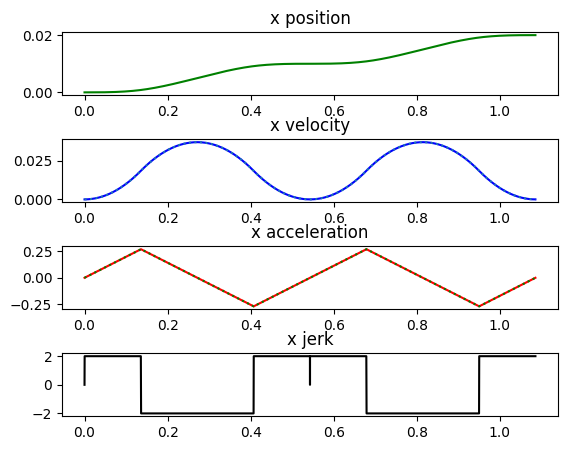

In [6]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list,x_list,'g')
ax1.title.set_text('x position')
ax2.plot(t_list,dx_list,'b')
ax2.title.set_text('x velocity')
ax2.plot(t_list,diff_x_list,':')
ax3.plot(t_list,ddx_list,'r')	
ax3.plot(t_list,diff_dx_list,'g:')
ax3.title.set_text('x acceleration')
ax4.plot(t_list,diff_ddx_list,'k')
ax4.title.set_text('x jerk')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

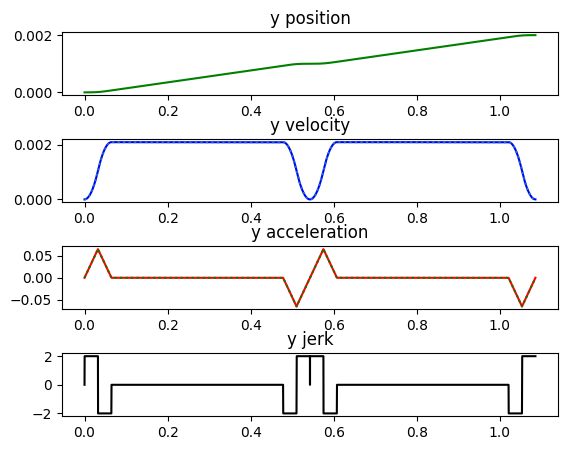

In [10]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list,y_list,'g')
ax1.title.set_text('y position')
ax2.plot(t_list,dy_list,'b')
ax2.title.set_text('y velocity')
ax2.plot(t_list,diff_y_list,':')
ax3.plot(t_list,ddy_list,'r')	
ax3.plot(t_list,diff_dy_list,'g:')
ax3.title.set_text('y acceleration')
ax4.plot(t_list,diff_ddy_list,'k')
ax4.title.set_text('y jerk')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

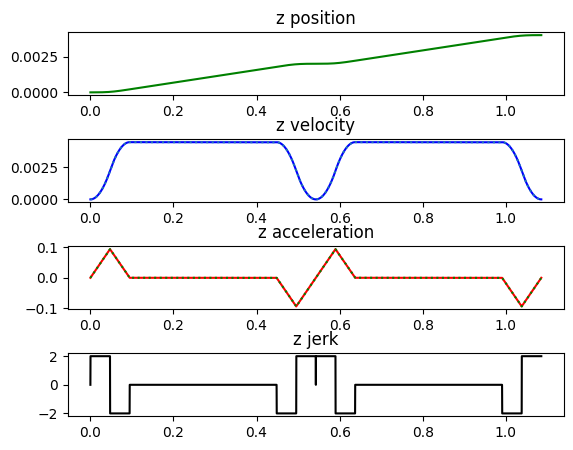

In [11]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list,z_list,'g')
ax1.title.set_text('z position')
ax2.plot(t_list,dz_list,'b')
ax2.title.set_text('z velocity')
ax2.plot(t_list,diff_z_list,':')
ax3.plot(t_list,ddz_list,'r')	
ax3.plot(t_list,diff_dz_list,'g:')
ax3.title.set_text('z acceleration')
ax4.plot(t_list,diff_ddz_list,'k')
ax4.title.set_text('z jerk')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

In [12]:

print(np.array(s_list_).shape)
s_x_list = [x for x in s_list_[:,0]]
ds_x_list = [x for x in ds_list_[:,0]]
dds_x_list = [x for x in dds_list_[:,0]]
ddds_x_list = [x for x in ddds_list_[:,0]]
s_y_list = [y for y in s_list_[:,1]]
ds_y_list = [y for y in ds_list_[:,1]]
dds_y_list = [y for y in dds_list_[:,1]]
ddds_y_list = [y for y in ddds_list_[:,1]]
s_z_list = [z for z in s_list_[:,2]]
ds_z_list = [z for z in ds_list_[:,2]]
dds_z_list = [z for z in dds_list_[:,2]]
ddds_z_list = [z for z in ddds_list_[:,2]]

(10856, 3)


(10856, 3)


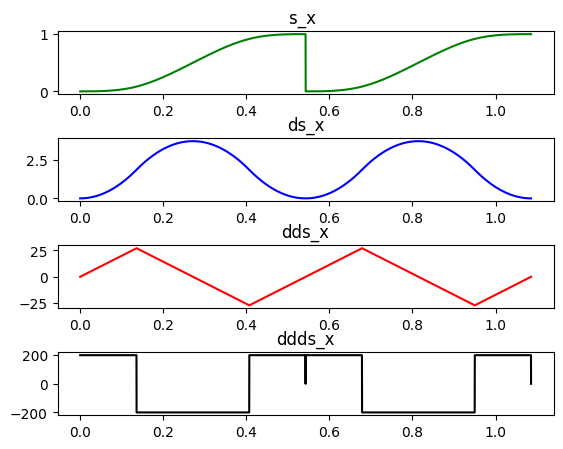

In [13]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
print(np.array(ds_list_).shape)
ax1.plot(t_list,s_x_list,'g')
ax1.title.set_text('s_x ')
ax2.plot(t_list,ds_x_list,'b')
ax2.title.set_text('ds_x')
ax3.plot(t_list,dds_x_list,'r')	
ax3.title.set_text('dds_x')
ax4.plot(t_list,ddds_x_list,'k')
ax4.title.set_text('ddds_x')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

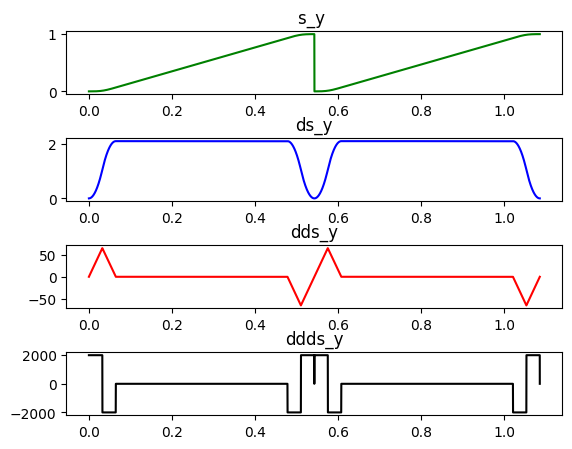

In [14]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list,s_y_list,'g')
ax1.title.set_text('s_y ')
ax2.plot(t_list,ds_y_list,'b')
ax2.title.set_text('ds_y')
ax3.plot(t_list,dds_y_list,'r')	
ax3.title.set_text('dds_y')
ax4.plot(t_list,ddds_y_list,'k')
ax4.title.set_text('ddds_y')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

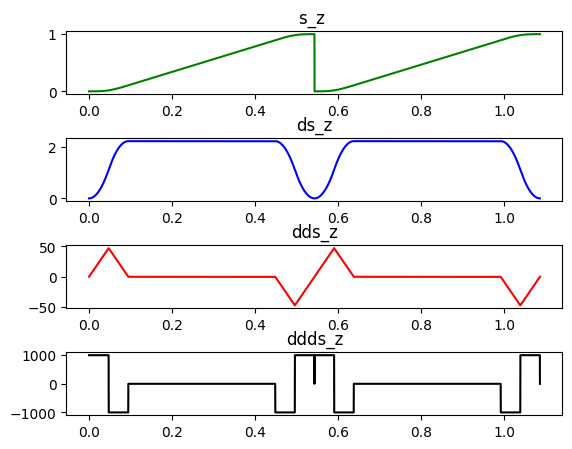

In [15]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list,s_z_list,'g')
ax1.title.set_text('s_z ')
ax2.plot(t_list,ds_z_list,'b')
ax2.title.set_text('ds_z')
ax3.plot(t_list,dds_z_list,'r')	
ax3.title.set_text('dds_z')
ax4.plot(t_list,ddds_z_list,'k')
ax4.title.set_text('ddds_z')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

In [16]:
print(len(s_z_list))


10856


In [17]:
cut_idx = [4500,6000]

(10856, 3)


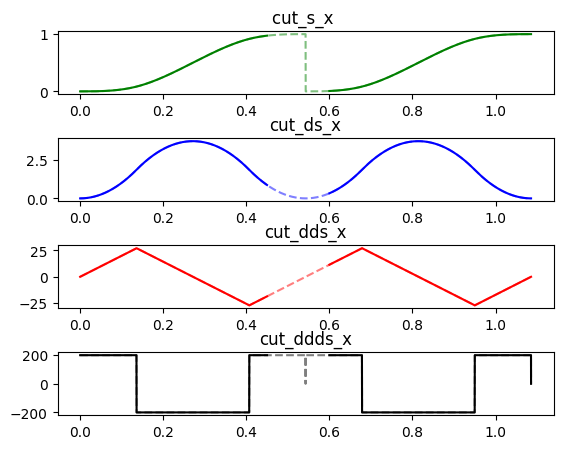

In [18]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
print(np.array(ds_list_).shape)
ax1.plot(t_list,s_x_list,'g--',alpha=0.5)
ax1.plot(t_list[:cut_idx[0]],s_x_list[:cut_idx[0]],'g')
ax1.plot(t_list[cut_idx[1]:],s_x_list[cut_idx[1]:],'g')
ax1.title.set_text('cut_s_x ')

ax2.plot(t_list,ds_x_list,'b--',alpha=0.5)
ax2.plot(t_list[:cut_idx[0]],ds_x_list[:cut_idx[0]],'b')
ax2.plot(t_list[cut_idx[1]:],ds_x_list[cut_idx[1]:],'b')
ax2.title.set_text('cut_ds_x')

ax3.plot(t_list,dds_x_list,'r--',alpha=0.5)
ax3.plot(t_list[:cut_idx[0]],dds_x_list[:cut_idx[0]],'r')
ax3.plot(t_list[cut_idx[1]:],dds_x_list[cut_idx[1]:],'r')
ax3.title.set_text('cut_dds_x')

ax4.plot(t_list,ddds_x_list,'k--',alpha=0.5)
ax4.plot(t_list[:cut_idx[0]],ddds_x_list[:cut_idx[0]],'k')
ax4.plot(t_list[cut_idx[1]:],ddds_x_list[cut_idx[1]:],'k')
ax4.title.set_text('cut_ddds_x')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

0.8599102919691406
0.3274053231854516
-18.546269619189083
11.443868632336734
6.84886
upper : 1
lower : 0.85991
6.84886
all ns : 19616
6.84886
-----------------------------------
|       AXIS      |       1       |
|-----------------|----------------
|       vp        |              1|
|       a1        |         15.557|
|       a2        |         20.044|
|       vmax      |              1|
|       amax      |             50|
|       dmax      |             50|
|       j         |            500|
|       so        |              0|
|       vo        |        0.85991|
|       ao        |        -18.546|
|       sf        |              1|
|       vf        |        0.32741|
|       af        |         11.444|
|-----------------|----------------
|       tj1       |       0.068207|
|       tca1      |     3.4694e-18|
|       tj2       |       0.031114|
|       tc        |        0.87598|
|       tj3       |       0.040089|
|       tca2      |     6.9389e-18|
|       tj4       |       0.06

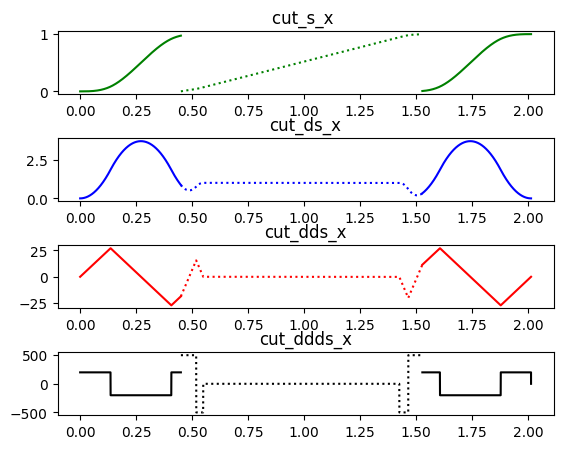

In [32]:
cut_x_traj =[]
cut_x_traj =Trajectory()
cut_x_traj.so = 0
cut_x_traj.sf = 1
cut_x_traj.vo = ds_x_list[cut_idx[0]]
cut_x_traj.vf = ds_x_list[cut_idx[1]]
cut_x_traj.ao = dds_x_list[cut_idx[0]]
cut_x_traj.af = dds_x_list[cut_idx[1]]
print(cut_x_traj.vo)
print(cut_x_traj.vf)
print(cut_x_traj.ao)
print(cut_x_traj.af)
cut_x_traj.amax = 50
cut_x_traj.dmax = 50
cut_x_traj.vmax = 1
cut_x_traj.j = 500
cut_x_traj.a1 = cut_x_traj.amax
cut_x_traj.a2 = cut_x_traj.dmax
cut_x_traj.vp = cut_x_traj.vmax

sg = ScurveGenerator([cut_x_traj])
sg.syncTime();
sg.printAllTrajectory()
cut_x_traj = sg.getTraj(0);
cut_x_s_list = []
cut_x_ds_list = []
cut_x_dds_list = []
cut_x_ddds_list = []
cut_x_t_list=[]
for i in range(0,int(cut_x_traj.tt/dt)):
    val = sg.generate(cut_x_traj,i*dt);
    cut_x_s_list.append(val[0])
    cut_x_ds_list.append(val[1])
    cut_x_dds_list.append(val[2])
    cut_x_ddds_list.append(val[3])
    cut_x_t_list.append(i*dt)
cut_x_t_list = np.array(cut_x_t_list)+t_list[cut_idx[0]]

plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
t_list= np.array(t_list)
print(np.array(ds_list_).shape)
ax1.plot(t_list[:cut_idx[0]],s_x_list[:cut_idx[0]],'g')
ax1.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_x_traj.tt+t_list[cut_idx[0]],s_x_list[cut_idx[1]:],'g')
ax1.plot(cut_x_t_list,cut_x_s_list,"g:")
ax1.title.set_text('cut_s_x ')

ax2.plot(t_list[:cut_idx[0]],ds_x_list[:cut_idx[0]],'b')
ax2.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_x_traj.tt+t_list[cut_idx[0]],ds_x_list[cut_idx[1]:],'b')
ax2.plot(cut_x_t_list,cut_x_ds_list,"b:")
ax2.title.set_text('cut_ds_x')

ax3.plot(t_list[:cut_idx[0]],dds_x_list[:cut_idx[0]],'r')
ax3.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_x_traj.tt+t_list[cut_idx[0]],dds_x_list[cut_idx[1]:],'r')
ax3.plot(cut_x_t_list,cut_x_dds_list,"r:")
ax3.title.set_text('cut_dds_x')

ax4.plot(t_list[:cut_idx[0]],ddds_x_list[:cut_idx[0]],'k')
ax4.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_x_traj.tt+t_list[cut_idx[0]],ddds_x_list[cut_idx[1]:],'k')
ax4.plot(cut_x_t_list,cut_x_ddds_list,"k:")
ax4.title.set_text('cut_ddds_x')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

In [ ]:
cut_y_traj =[]
cut_y_traj =Trajectory()
cut_y_traj.vo = ds_y_list[cut_idx[0]]
cut_y_traj.vf = ds_y_list[cut_idx[1]]
cut_y_traj.ao = dds_y_list[cut_idx[0]]
cut_y_traj.af = dds_y_list[cut_idx[1]]
print(cut_x_traj.vo)
print(cut_x_traj.vf)
print(cut_x_traj.ao)
print(cut_x_traj.af)
cut_y_traj.so = 0
cut_y_traj.sf = 1
cut_y_traj.amax = 50
cut_y_traj.dmax = 50
cut_y_traj.vmax = 3
cut_y_traj.j = 500
cut_y_traj.a1 = cut_y_traj.amax
cut_y_traj.a2 = cut_y_traj.dmax
cut_y_traj.vp = cut_y_traj.vmax

sg = ScurveGenerator([cut_y_traj])
sg.syncTime();
#sg.syncTargetTime(8);


cut_y_traj = sg.getTraj(0);
cut_y_s_list = []
cut_y_ds_list = []
cut_y_dds_list = []
cut_y_ddds_list = []
cut_y_t_list=[]
for i in range(0,int(cut_y_traj.tt/dt)):
    val = sg.generate(cut_y_traj,i*dt);
    cut_y_s_list.append(val[0])
    cut_y_ds_list.append(val[1])
    cut_y_dds_list.append(val[2])
    cut_y_ddds_list.append(val[3])
    cut_y_t_list.append(i*dt)
cut_y_t_list = np.array(cut_y_t_list)+t_list[cut_idx[0]]

plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
t_list= np.array(t_list)
print(np.array(ds_list_).shape)
ax1.plot(t_list[:cut_idx[0]],s_y_list[:cut_idx[0]],'g')
ax1.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_y_traj.tt+t_list[cut_idx[0]],s_y_list[cut_idx[1]:],'g')
ax1.plot(cut_y_t_list,cut_y_s_list,"g:")
ax1.title.set_text('cut_s_y ')

ax2.plot(t_list[:cut_idx[0]],ds_y_list[:cut_idx[0]],'b')
ax2.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_y_traj.tt+t_list[cut_idx[0]],ds_y_list[cut_idx[1]:],'b')
ax2.plot(cut_y_t_list,cut_y_ds_list,"b:")
ax2.title.set_text('cut_ds_y')

ax3.plot(t_list[:cut_idx[0]],dds_y_list[:cut_idx[0]],'r')
ax3.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_y_traj.tt+t_list[cut_idx[0]],dds_y_list[cut_idx[1]:],'r')
ax3.plot(cut_y_t_list,cut_y_dds_list,"r:")
ax3.title.set_text('cut_dds_y')

ax4.plot(t_list[:cut_idx[0]],ddds_y_list[:cut_idx[0]],'k')
ax4.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_y_traj.tt+t_list[cut_idx[0]],ddds_y_list[cut_idx[1]:],'k')
ax4.plot(cut_y_t_list,cut_y_ddds_list,"k:")
ax4.title.set_text('cut_ddds_y')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

0.8599102919691406
0.3274053231854516
-18.546269619189083
11.443868632336734
4.73895
upper : 3
lower : 2.22849
4.73895
upper : 0.151347
lower : 2.22849
upper : 2.22556
lower : 1.53709
upper : 0.151347
lower : 1e-20
all ns : 28358
4.73895
-----------------------------------
|       AXIS      |       1       |
|-----------------|----------------
|       vp        |              3|
|       a1        |         19.678|
|       a2        |          37.74|
|       vmax      |              3|
|       amax      |             50|
|       dmax      |             50|
|       j         |            500|
|       so        |              0|
|       vo        |         2.2285|
|       ao        |        -1.7135|
|       sf        |              1|
|       vf        |         1.5371|
|       af        |         37.226|
|-----------------|----------------
|       tj1       |       0.042783|
|       tca1      |     1.3878e-17|
|       tj2       |       0.039356|
|       tc        |        0.16773|
|     

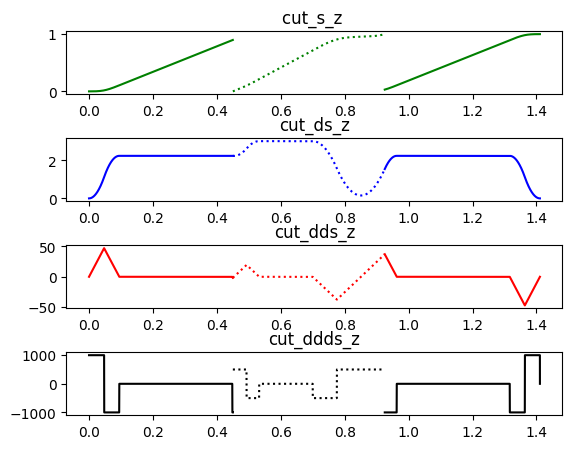

In [20]:
cut_z_traj =[]
cut_z_traj =Trajectory()
cut_z_traj.vo = ds_z_list[cut_idx[0]]
cut_z_traj.vf = ds_z_list[cut_idx[1]]
cut_z_traj.ao = dds_z_list[cut_idx[0]]
cut_z_traj.af = dds_z_list[cut_idx[1]]
print(cut_x_traj.vo)
print(cut_x_traj.vf)
print(cut_x_traj.ao)
print(cut_x_traj.af)
cut_z_traj.so = 0
cut_z_traj.sf = 1
cut_z_traj.amax = 50
cut_z_traj.dmax = 50
cut_z_traj.vmax = 3
cut_z_traj.j = 500
cut_z_traj.a1 = cut_z_traj.amax
cut_z_traj.a2 = cut_z_traj.dmax
cut_z_traj.vp = cut_z_traj.vmax

sg = ScurveGenerator([cut_z_traj])
sg.syncTime();

sg.printAllTrajectory()

cut_z_traj = sg.getTraj(0);

cut_z_s_list = []
cut_z_ds_list = []
cut_z_dds_list = []
cut_z_ddds_list = []
cut_z_t_list=[]
for i in range(0,int(cut_z_traj.tt/dt)):
    val = sg.generate(cut_z_traj,i*dt);
    cut_z_s_list.append(val[0])
    cut_z_ds_list.append(val[1])
    cut_z_dds_list.append(val[2])
    cut_z_ddds_list.append(val[3])
    cut_z_t_list.append(i*dt)
cut_z_t_list = np.array(cut_z_t_list)+t_list[cut_idx[0]]

plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
t_list= np.array(t_list)
print(np.array(ds_list_).shape)
ax1.plot(t_list[:cut_idx[0]],s_z_list[:cut_idx[0]],'g')
ax1.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_z_traj.tt+t_list[cut_idx[0]],s_z_list[cut_idx[1]:],'g')
ax1.plot(cut_z_t_list,cut_z_s_list,"g:")
ax1.title.set_text('cut_s_z ')

ax2.plot(t_list[:cut_idx[0]],ds_z_list[:cut_idx[0]],'b')
ax2.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_z_traj.tt+t_list[cut_idx[0]],ds_z_list[cut_idx[1]:],'b')
ax2.plot(cut_z_t_list,cut_z_ds_list,"b:")
ax2.title.set_text('cut_ds_z')

ax3.plot(t_list[:cut_idx[0]],dds_z_list[:cut_idx[0]],'r')
ax3.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_z_traj.tt+t_list[cut_idx[0]],dds_z_list[cut_idx[1]:],'r')
ax3.plot(cut_z_t_list,cut_z_dds_list,"r:")
ax3.title.set_text('cut_dds_z')

ax4.plot(t_list[:cut_idx[0]],ddds_z_list[:cut_idx[0]],'k')
ax4.plot(t_list[cut_idx[1]:]-t_list[cut_idx[1]]+cut_z_traj.tt+t_list[cut_idx[0]],ddds_z_list[cut_idx[1]:],'k')
ax4.plot(cut_z_t_list,cut_z_ddds_list,"k:")
ax4.title.set_text('cut_ddds_z')    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()